# **Student Score Prediction**

## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Load Data**

In [2]:
student_data = pd.read_csv("/content/StudentPerformanceFactors.csv")

student_data.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


## **Data Exploration & Preprocessing**

In [3]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
student_data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [5]:
student_data.dropna(inplace=True)

## **Data Visualization**

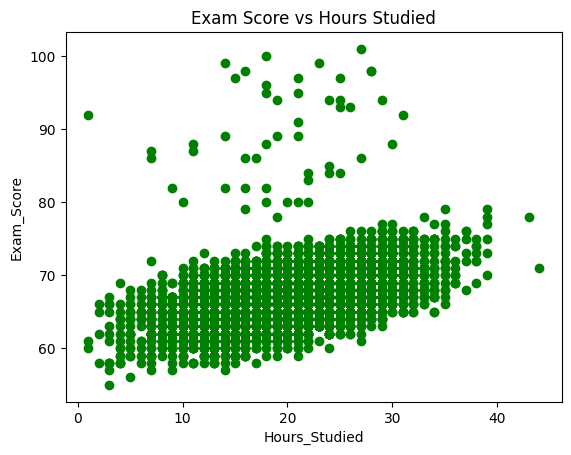

In [6]:
plt.scatter(student_data['Hours_Studied'], student_data['Exam_Score'], color = 'green')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Exam Score vs Hours Studied')
plt.show()

## **Spliting dataset into training and testing set**


In [7]:
from sklearn.model_selection import train_test_split

X = student_data[["Hours_Studied"]]
y = student_data["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## **Linear Regression**

In [8]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

print("Intercept :", LR.intercept_)
print("Coefficient :", LR.coef_)

Intercept : 61.42212126722494
Coefficient : [0.2927191]


## **Model Evaluation**

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = LR.predict(X_test)

rmse_linear =(np.sqrt(mean_squared_error(y_test, y_pred)))
R2_linear = r2_score(y_test, y_pred)

print("RMSE :", rmse_linear)
print("R2 :", R2_linear)

RMSE : 3.223589480967947
R2 : 0.21161979575788192


## **Plynomial Reression**

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("Original feature count:", X_train.shape[1])
print("After polynomial expansion:", X_train_poly.shape[1])

Original feature count: 1
After polynomial expansion: 2


In [11]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [12]:
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluation metrics
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Evaluation:")
print("RMSE:", rmse_poly)
print("R²:", r2_poly)

Polynomial Regression Evaluation:
RMSE: 3.2218275769664184
R²: 0.21248136367219017


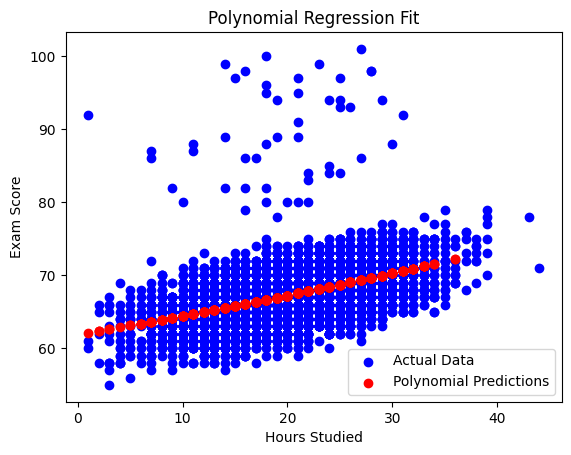

In [13]:
# Visualization
plt.scatter(X, y, color="blue", label="Actual Data")
plt.scatter(X_test, y_pred_poly, color="red", label="Polynomial Predictions")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()

In [14]:
print("📊 Model Performance Comparison:")
print(f"Linear Regression -> RMSE: {rmse_linear:.2f}, R²: {R2_linear:.2f}")
print(f"Polynomial Regression -> RMSE: {rmse_poly:.2f}, R²: {r2_poly:.2f}")

📊 Model Performance Comparison:
Linear Regression -> RMSE: 3.22, R²: 0.21
Polynomial Regression -> RMSE: 3.22, R²: 0.21


In [15]:
# Example input
Hours_Studied = [[5]]   # 2D array since sklearn expects 2D for features

# Predict using trained linear model
predicted_score = LR.predict(Hours_Studied)
print("Predicted Exam Score:", predicted_score[0])


Predicted Exam Score: 62.885716743882796
